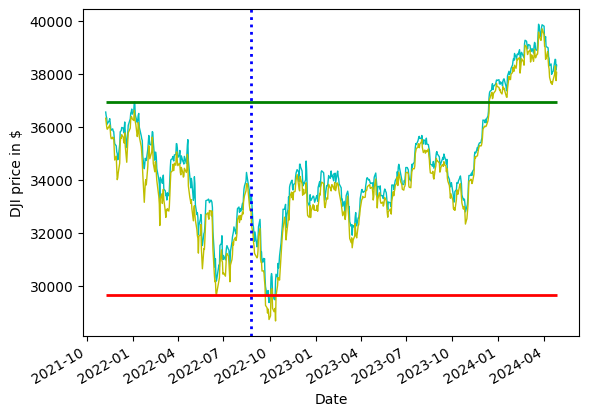

In [1]:
import pandas as pd

dji_data_result = pd.read_csv('dji_data.csv', index_col=0)

dji_data=dji_data_result.tail(620)
dji_data.index = pd.to_datetime(dji_data.index)
lows=dji_data['Low']
highs=dji_data['High']

import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='DJI price in $')
highs.plot(ax=ax1, color='c', lw=1.)
lows.plot(ax=ax1, color='y', lw=1.)

plt.hlines(highs.head(200).max(), lows.index.values[0], lows.index.values[-1], linewidth=2, color='g')
plt.hlines(lows.head(200).min(), lows.index.values[0], lows.index.values[-1], linewidth=2, color='r')
plt.axvline(linewidth=2, color='b', x=lows.index.values[200], linestyle=':')
plt.show()

In [2]:
import pandas as pd
import numpy as np

def trading_support_resistance(data, bin_width=20):
    data['sup_tolerance'] = pd.Series(np.zeros(len(data)))
    data['res_tolerance'] = pd.Series(np.zeros(len(data)))
    data['sup_count'] = pd.Series(np.zeros(len(data)))
    data['res_count'] = pd.Series(np.zeros(len(data)))
    data['sup'] = pd.Series(np.zeros(len(data)))
    data['res'] = pd.Series(np.zeros(len(data)))
    data['positions'] = pd.Series(np.zeros(len(data)))
    data['signal'] = pd.Series(np.zeros(len(data)))
    in_support=0
    in_resistance=0

    for x in range((bin_width - 1) + bin_width, len(data)):
        data_section = data[x - bin_width:x + 1]
        support_level=min(data_section['price'])
        resistance_level=max(data_section['price'])
        range_level=resistance_level-support_level
        data["res"][x] = resistance_level
        data["sup"][x] = support_level
        data["sup_tolerance"][x] = support_level + 0.2 * range_level
        data["res_tolerance"][x] = resistance_level - 0.2 * range_level
        if data['price'][x]>=data['res_tolerance'][x] and\
            data['price'][x] <= data['res'][x]:
            in_resistance+=1
            data["res_count"][x] = in_resistance
        elif data['price'][x] <= data['sup_tolerance'][x] and \
            data['price'][x] >= data['sup'][x]:
            in_support += 1
            data["sup_count"][x] = in_support
        else:
            in_support=0
            in_resistance=0

        if in_resistance>2:
            data["signal"][x] = 1
        elif in_support>2:
            data["signal"][x] = 0
        else:
            data['signal'][x] = data['signal'][x - 1]

    data['positions']=data['signal'].diff()

C:\Users\NeroHP\AppData\Local\Temp\ipykernel_9816\399443881.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data["res"][x] = resistance_level
C:\Users\NeroHP\AppData\Local\Temp\ipykernel_9816\399443881.py:21: FutureWarning: Series.__set

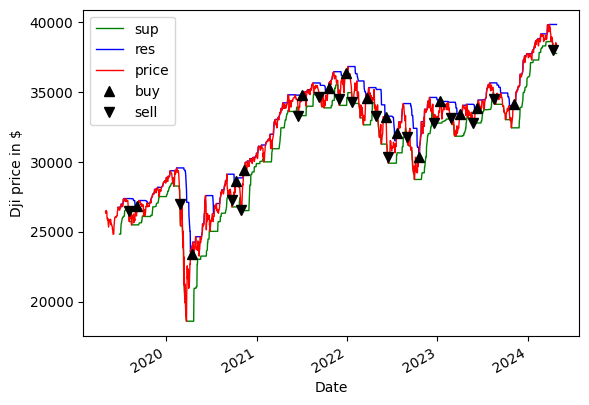

In [3]:
import pandas as pd

dji_data_result = pd.read_csv('dji_data.csv', index_col=0)

dji_data_result.index = pd.to_datetime(dji_data_result.index)

dji_data_signal = pd.DataFrame(index=dji_data_result.index)
dji_data_signal['price'] = dji_data_result['Close']

trading_support_resistance(dji_data_signal)

import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Dji price in $')

dji_data_signal['sup'].plot(ax=ax1, color='g', lw=1.)
dji_data_signal['res'].plot(ax=ax1, color='b', lw=1.)
dji_data_signal['price'].plot(ax=ax1, color='r', lw=1.)

ax1.plot(dji_data_signal.loc[dji_data_signal.positions == 1.0].index, dji_data_signal.price[dji_data_signal.positions == 1.0], '^', markersize=7, color='k',label='buy')
ax1.plot(dji_data_signal.loc[dji_data_signal.positions == -1.0].index, dji_data_signal.price[dji_data_signal.positions == -1.0], 'v', markersize=7, color='k',label='sell')
plt.legend()
plt.show()